In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("loan_data.csv")
df.head(4)

,race,gender,date,zip,income,type,term,interest,principal,approved,adj_bls_2,id
0,hispanic/latino,male,2016-01-01,60623.0,72230.0,home,180,3.389672,508761,False,0.34,AP20161-0-2
1,other,male,2013-03-01,60625.0,18543.0,home,360,0.277318,119738,False,0.14,AP20133-1-23
2,other,male,2011-11-01,60623.0,30228.0,home,240,4.398939,265779,False,0.08,AP201111-2-22
3,hispanic/latino,male,2014-08-01,60623.0,11129.0,personal,60,5.221935,15590,True,0.09,AP20148-1-29


In [2]:
df.describe()

,zip,income,term,interest,principal,adj_bls_2
count,1276.000000,1057.000000,1307.000000,1307.000000,1.307000e+03,1307.000000
mean,60622.147335,56449.816462,145.051262,6.178482,2.339360e+05,0.616442
std,7.673959,51663.344437,122.389180,3.998272,3.598328e+05,0.669918
min,60611.000000,58.000000,12.000000,0.113993,1.100000e+01,0.070000
25%,60615.000000,21802.000000,60.000000,3.706491,1.615000e+04,0.110000
50%,60623.000000,42563.000000,72.000000,5.351268,4.310800e+04,0.240000
75%,60625.000000,74677.000000,240.000000,7.138273,3.753060e+05,1.150000
max,60637.000000,354654.000000,360.000000,27.375003,2.750416e+06,2.270000


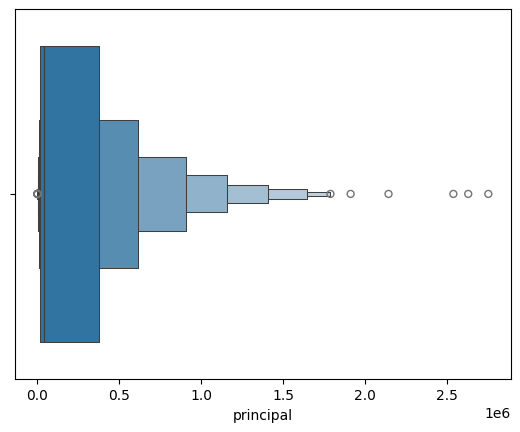

In [3]:
sns.boxenplot(x="principal",data=df)
plt.show()

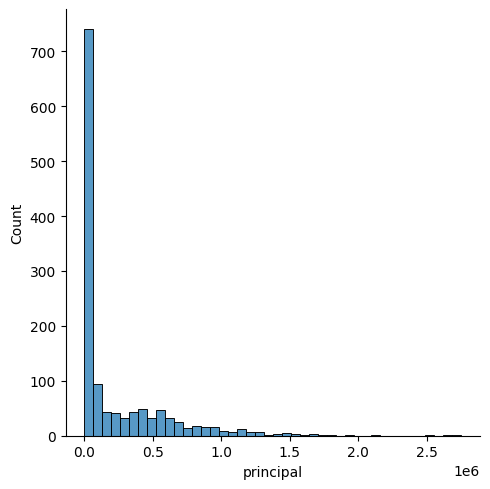

In [4]:
sns.displot(x="principal",data=df)
plt.show()

Direct method remove outlier

In [5]:
min_range = df["principal"].mean() - (3*df["principal"].std())
max_range = df ["principal"].mean() + (3*df["principal"].std())

In [6]:
min_range, max_range

(np.float64(-845562.3206007496), np.float64(1313434.3879305124))

In [8]:
new_df=df[df["principal"] <= max_range]
new_df

,race,gender,date,zip,income,type,term,interest,principal,approved,adj_bls_2,id
0,hispanic/latino,male,2016-01-01,60623.0,72230.0,home,180,3.389672,508761,False,0.34,AP20161-0-2
1,other,male,2013-03-01,60625.0,18543.0,home,360,0.277318,119738,False,0.14,AP20133-1-23
2,other,male,2011-11-01,60623.0,30228.0,home,240,4.398939,265779,False,0.08,AP201111-2-22
3,hispanic/latino,male,2014-08-01,60623.0,11129.0,personal,60,5.221935,15590,True,0.09,AP20148-1-29
4,black,female,2016-11-01,60637.0,NaN,personal,60,10.843707,56301,True,0.41,AP201611-0-38
...,...,...,...,...,...,...,...,...,...,...,...,...
1302,hispanic/latino,male,2015-12-01,60626.0,24011.0,auto,84,2.975299,23189,False,0.24,AP201512-3-94
1303,hispanic/latino,male,2015-12-01,60626.0,24011.0,auto,84,2.975299,23189,False,0.24,AP201512-3-94
1304,hispanic/latino,male,2015-12-01,60626.0,24011.0,auto,84,2.975299,23189,False,0.24,AP201512-3-94
1305,black,female,2017-07-01,60623.0,34474.0,personal,12,4.117964,32811,False,1.15,AP20177-0-60


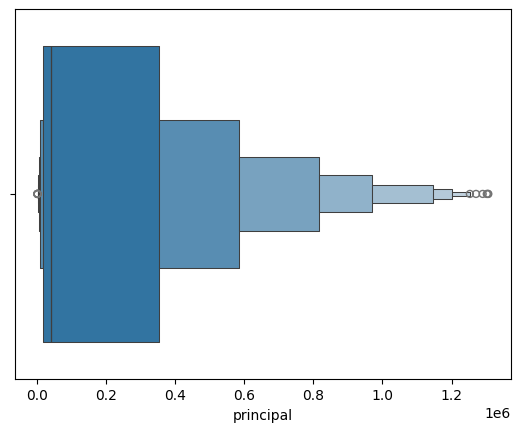

In [9]:
sns.boxenplot(x="principal",data=new_df)
plt.show()

In [10]:
z_score=(df["principal"] - df["principal"].mean())/(df["principal"].std())
z_score

0       0.763757
1      -0.317364
2       0.088494
3      -0.606799
4      -0.493660
          ...   
1302   -0.585680
1303   -0.585680
1304   -0.585680
1305   -0.558940
1306   -0.558940
Name: principal, Length: 1307, dtype: float64

In [11]:
z_score > 3

0       False
1       False
2       False
3       False
4       False
        ...  
1302    False
1303    False
1304    False
1305    False
1306    False
Name: principal, Length: 1307, dtype: bool

In [12]:
df["z_score"]=z_score

In [13]:
df[df["z_score"] < 3]

,race,gender,date,zip,income,type,term,interest,principal,approved,adj_bls_2,id,z_score
0,hispanic/latino,male,2016-01-01,60623.0,72230.0,home,180,3.389672,508761,False,0.34,AP20161-0-2,0.763757
1,other,male,2013-03-01,60625.0,18543.0,home,360,0.277318,119738,False,0.14,AP20133-1-23,-0.317364
2,other,male,2011-11-01,60623.0,30228.0,home,240,4.398939,265779,False,0.08,AP201111-2-22,0.088494
3,hispanic/latino,male,2014-08-01,60623.0,11129.0,personal,60,5.221935,15590,True,0.09,AP20148-1-29,-0.606799
4,black,female,2016-11-01,60637.0,NaN,personal,60,10.843707,56301,True,0.41,AP201611-0-38,-0.493660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,hispanic/latino,male,2015-12-01,60626.0,24011.0,auto,84,2.975299,23189,False,0.24,AP201512-3-94,-0.585680
1303,hispanic/latino,male,2015-12-01,60626.0,24011.0,auto,84,2.975299,23189,False,0.24,AP201512-3-94,-0.585680
1304,hispanic/latino,male,2015-12-01,60626.0,24011.0,auto,84,2.975299,23189,False,0.24,AP201512-3-94,-0.585680
1305,black,female,2017-07-01,60623.0,34474.0,personal,12,4.117964,32811,False,1.15,AP20177-0-60,-0.558940
